Importing Libraries for Data Visualization and Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt    #
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
#from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings

C:\Users\chavd\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import pymongo
from pymongo import MongoClient

In [3]:
client= MongoClient('localhost',27017)
db = client ['car_data']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'car_data')

In [4]:
coll_name= db["Used_Car"]
df =pd.DataFrame(list(coll_name.find()))      
df.head()    

,_id,title,year,model,location,type,odometer,mpg,transmisson,engine,engine_cap,make,price
0,62e58c8f3d0edcbf7eff9d90,2015 Dodge Dart,2015,Dodge Dart,"Pasadena, CA",Sedan,"59,012",25,Automatic,2.0L Inline-4 Gas,2,Dodge,"$9,995"
1,62e58c8f3d0edcbf7eff9d91,2015 Dodge Dart,2015,Dodge Dart,"Fort Lauderdale, FL",Sedan,"103,035",22,Automatic,2.4L Inline-4 Gas,2.4,Dodge,"$8,499"
2,62e58c8f3d0edcbf7eff9d92,2019 Dodge Charger,2019,Dodge Charger,NaN,Sedan,NaN,19,Automatic,3.6L V-6 Gas,3.6,Dodge,"$29,850"
3,62e58c8f3d0edcbf7eff9d93,2018 Dodge Journey,2018,Dodge Journey,NaN,SUV,NaN,19,Automatic,2.4L Inline-4 Gas,2.4,Dodge,"$19,900"
4,62e58c8f3d0edcbf7eff9d94,2018 Dodge Grand Caravan,2018,Dodge Grand Caravan,"Henderson, NV",Minivan,"54,507",17,Automatic,3.6L V-6 Gas,3.6,Dodge,"$20,992"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27608 entries, 0 to 27607
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          27608 non-null  object
 1   title        27608 non-null  object
 2   year         27608 non-null  object
 3   model        27608 non-null  object
 4   location     22665 non-null  object
 5   type         27608 non-null  object
 6   odometer     22665 non-null  object
 7   mpg          26693 non-null  object
 8   transmisson  26784 non-null  object
 9   engine       27608 non-null  object
 10  engine_cap   27608 non-null  object
 11  make         27608 non-null  object
 12  price        27608 non-null  object
dtypes: object(13)
memory usage: 2.7+ MB


In [6]:
fd = df.drop(['location','title','_id'],axis=1)
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27608 entries, 0 to 27607
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         27608 non-null  object
 1   model        27608 non-null  object
 2   type         27608 non-null  object
 3   odometer     22665 non-null  object
 4   mpg          26693 non-null  object
 5   transmisson  26784 non-null  object
 6   engine       27608 non-null  object
 7   engine_cap   27608 non-null  object
 8   make         27608 non-null  object
 9   price        27608 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


In [7]:
fd['engine']=fd['engine'].str.split('L').str[0]
make=fd['model'].str.split(' ').str[0]
fd = fd[fd.engine != '4WD']
fd = fd[fd.engine != 'RWD']
fd = fd[fd.engine != 'AWD']

# fd['model']=fd['model'].str.split(' ',1).str[1]
# fd.insert(1,'make',make)

In [8]:
fd.sample(100,random_state=2)

,year,model,type,odometer,mpg,transmisson,engine,engine_cap,make,price
19929,2019,Toyota Highlander,SUV,"9,923",20,Automatic,3.5,3.5,Toyota,"$39,990"
15986,2015,Ford Focus,Sedan,"89,370",26,Manual,2.0,2,Ford,"$11,990"
10907,2018,Ford F-150,Pickup Truck,NaN,18,Automatic,2.7,2.7,Ford,"$31,990"
696,2016,Dodge Grand Caravan,Minivan,"88,364",17,Automatic,3.6,3.6,Dodge,"$13,600"
20754,2020,Toyota RAV4,SUV,"21,661",27,Automatic,2.5,2.5,Toyota,"$34,999"
...,...,...,...,...,...,...,...,...,...,...
8114,2020,Dodge Durango,SUV,"54,843",14,Automatic,5.7,5.7,Dodge,"$42,900"
3872,2019,Dodge Grand Caravan,Minivan,"62,392",17,Automatic,3.6,3.6,Dodge,"$24,303"
17291,2013,Ford F-150,Pickup Truck,"145,591",16,Automatic,5.0,5,Ford,"$17,000"
12109,2019,Ford F-150,Pickup Truck,"60,947",18,Automatic,5.0,5,Ford,"$35,988"


In [9]:
fd.isnull().sum()

year              0
model             0
type              0
odometer       4643
mpg               0
transmisson       0
engine            0
engine_cap        0
make              0
price             0
dtype: int64

In [10]:

fd['odometer']=fd['odometer'].astype(str)
fd['odometer']=fd['odometer'].str.replace(',','')
#fd['odometer']=fd['odometer'].str.replace('nan',np.nan)
fd['odometer']=fd['odometer'].replace('nan',np.nan)

In [11]:
fd['transmisson'] = fd['transmisson'].fillna("Not Specified")
fd['mpg']=fd['mpg'].fillna(fd['mpg'].median())

In [12]:
fd['odometer'] = fd['odometer'].astype(float)
fd['mpg'] = fd['mpg'].astype(float)
#fd['engine_cap'] = fd['engine_cap'].astype(str)
fd=fd.drop(['engine'],axis=1)
#fd['engine_cap'] = fd['engine_cap'].astype(float)

In [13]:
fd.dropna()

,year,model,type,odometer,mpg,transmisson,engine_cap,make,price
0,2015,Dodge Dart,Sedan,59012.0,25.0,Automatic,2,Dodge,"$9,995"
1,2015,Dodge Dart,Sedan,103035.0,22.0,Automatic,2.4,Dodge,"$8,499"
4,2018,Dodge Grand Caravan,Minivan,54507.0,17.0,Automatic,3.6,Dodge,"$20,992"
5,2019,Dodge Charger,Sedan,24311.0,15.0,Automatic,6.4,Dodge,"$44,881"
7,2019,Dodge Grand Caravan,Minivan,54642.0,17.0,Automatic,3.6,Dodge,"$22,617"
...,...,...,...,...,...,...,...,...,...
27602,2020,Toyota RAV4,SUV,48359.0,27.0,Automatic,2.5,Toyota,"$24,995"
27603,2016,Toyota Highlander,SUV,80714.0,18.0,Automatic,3.5,Toyota,"$29,990"
27604,2018,Toyota RAV4,SUV,95421.0,23.0,Automatic,2.5,Toyota,"$20,895"
27606,2019,Toyota RAV4,SUV,7459.0,25.0,Automatic,2.5,Toyota,"$33,979"


In [14]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26693 entries, 0 to 27607
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         26693 non-null  object 
 1   model        26693 non-null  object 
 2   type         26693 non-null  object 
 3   odometer     22050 non-null  float64
 4   mpg          26693 non-null  float64
 5   transmisson  26693 non-null  object 
 6   engine_cap   26693 non-null  object 
 7   make         26693 non-null  object 
 8   price        26693 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.0+ MB


In [15]:
types = pd.DataFrame(df['type'].value_counts()).reset_index()
types.columns = ['types', 'counts']
types['percent'] = types.counts.apply(lambda x: 100 * x / types.counts.sum())
types

,types,counts,percent
0,SUV,10054,36.416981
1,Pickup Truck,6711,24.308172
2,Sedan,6592,23.877137
3,Minivan,1993,7.218922
4,Coupe,1818,6.585048
5,Hatchback,164,0.594031
6,Cargo Van,115,0.416546
7,Convertible,104,0.376702
8,Chassis Cab Truck,22,0.079687
9,Wagon,19,0.068821


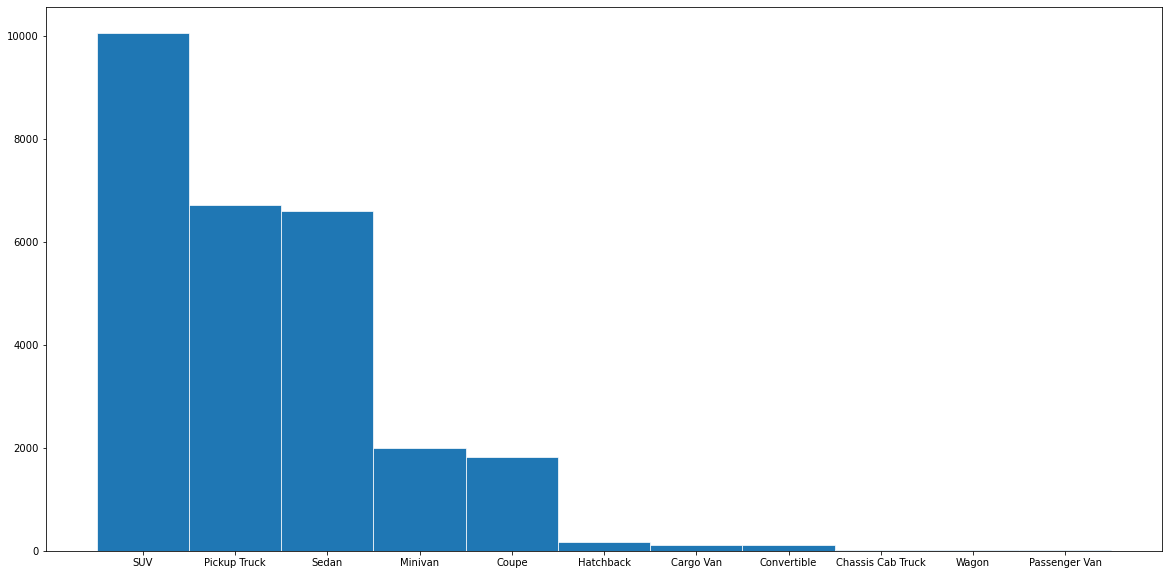

In [16]:
fig, ax2 = plt.subplots(figsize=(20,10))

colors = sns.color_palette('bright')

ax2.bar(types.types, types.counts, width=1, edgecolor="white", linewidth=0.7)
plt.show()

In [17]:
df1=fd.sample(200,random_state=2)

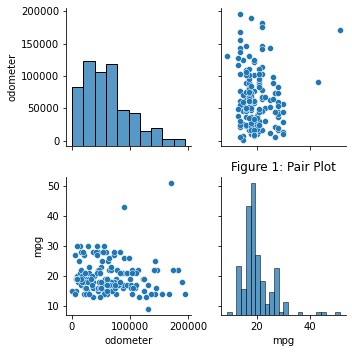

In [18]:
sns.pairplot(df1)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

In [19]:
#fd['price']=fd['price'].astype(str)
#fd.info()
fd['price'] = fd['price'].replace("No Price Available",np.nan)

fd['price'] = fd['price'].str.replace(',', '')
fd['price'] = fd['price'].str.replace('$', '')
fd['price']

C:\Users\chavd\AppData\Local\Temp\ipykernel_9836\437128477.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fd['price'] = fd['price'].str.replace('$', '')


0         9995
1         8499
2        29850
3        19900
4        20992
         ...  
27603    29990
27604    20895
27605    33299
27606    33979
27607    29988
Name: price, Length: 26693, dtype: object

In [20]:

fd.dropna()


,year,model,type,odometer,mpg,transmisson,engine_cap,make,price
0,2015,Dodge Dart,Sedan,59012.0,25.0,Automatic,2,Dodge,9995
1,2015,Dodge Dart,Sedan,103035.0,22.0,Automatic,2.4,Dodge,8499
4,2018,Dodge Grand Caravan,Minivan,54507.0,17.0,Automatic,3.6,Dodge,20992
5,2019,Dodge Charger,Sedan,24311.0,15.0,Automatic,6.4,Dodge,44881
7,2019,Dodge Grand Caravan,Minivan,54642.0,17.0,Automatic,3.6,Dodge,22617
...,...,...,...,...,...,...,...,...,...
27602,2020,Toyota RAV4,SUV,48359.0,27.0,Automatic,2.5,Toyota,24995
27603,2016,Toyota Highlander,SUV,80714.0,18.0,Automatic,3.5,Toyota,29990
27604,2018,Toyota RAV4,SUV,95421.0,23.0,Automatic,2.5,Toyota,20895
27606,2019,Toyota RAV4,SUV,7459.0,25.0,Automatic,2.5,Toyota,33979


C:\Users\chavd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


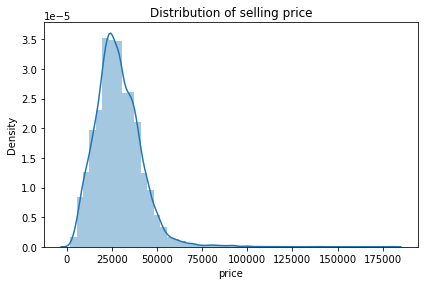

In [21]:
sns.distplot(fd.price)
plt.tight_layout()
plt.title("Distribution of selling price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

C:\Users\chavd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


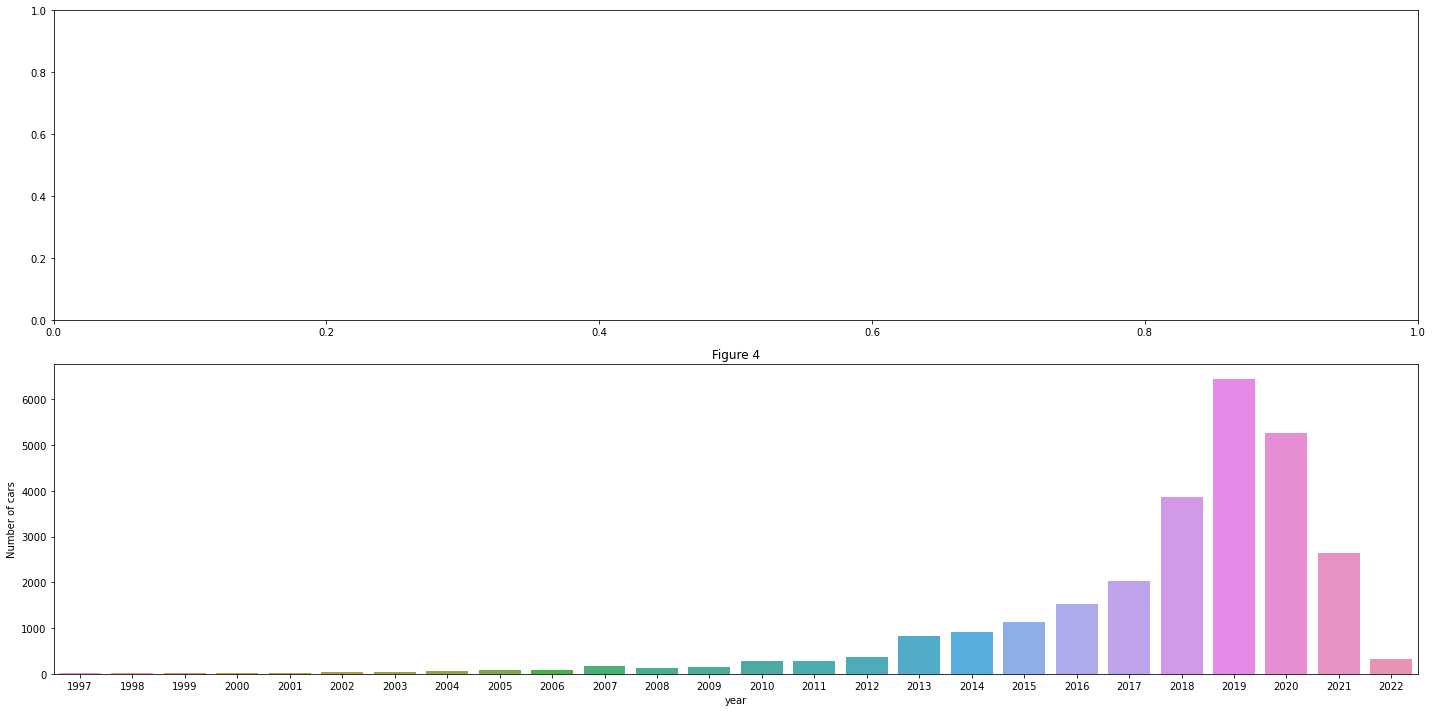

In [22]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
#sns.barplot(x='year',y='price',data=fd,ax=axs[0])
sns.barplot(fd.groupby('year').count()['price'].index,fd.groupby('year').count()['price'].values,ax=axs[1])
#axs[0].set_title('Figure 3')
axs[1].set_title('Figure 4')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.savefig('Insight-Figure-3-4.jpg',dpi=600)
plt.show()

C:\Users\chavd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chavd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


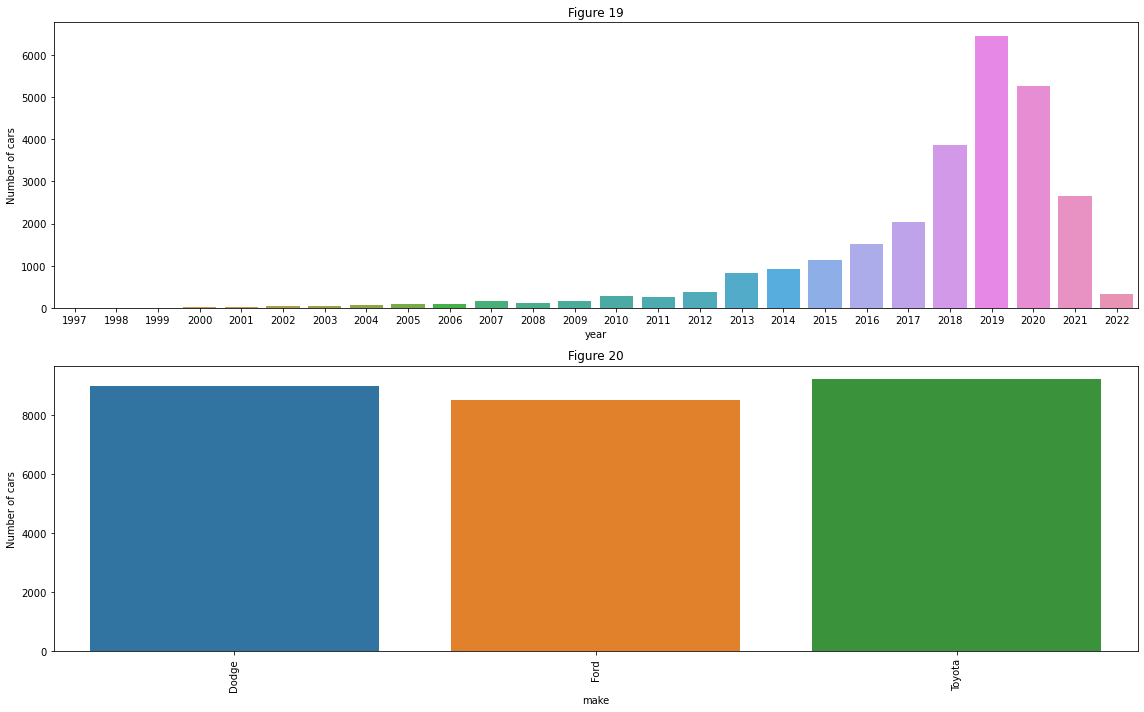

In [23]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.barplot(fd.groupby('year').count()['price'].index,fd.groupby('year').count()['price'].values,ax=axs[0])
sns.barplot(fd.groupby('make').count()['price'].index,fd.groupby('make').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Figure 19')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Figure 20')
axs[1].set_xticklabels(fd.groupby('make').count()['price'].index,rotation=90)
plt.tight_layout()
plt.show()

In [24]:
fd=fd.dropna()
fd['price']=fd['price'].astype(float)
types = pd.DataFrame(df['type'].value_counts()).reset_index()
types.columns = ['types', 'counts']

print(fd['transmisson'].value_counts())
print(types)

Automatic    21477
Manual         571
Name: transmisson, dtype: int64
                types  counts
0                 SUV   10054
1        Pickup Truck    6711
2               Sedan    6592
3             Minivan    1993
4               Coupe    1818
5           Hatchback     164
6           Cargo Van     115
7         Convertible     104
8   Chassis Cab Truck      22
9               Wagon      19
10      Passenger Van      16


In [25]:
num_col=['year','odometer','mpg']
cat_cols=['make','model','transmisson','type']

In [26]:
le=preprocessing.LabelEncoder()
fd[cat_cols]=fd[cat_cols].apply(le.fit_transform)
np.save('classes.npy',le.classes_)

In [27]:
norm = StandardScaler()
fd['price'] = np.log(fd['price'])
fd['odometer'] = np.log(fd['odometer'])
fd['year']=fd['year'].astype(int)
fd['year'] = np.log(fd['year'])
#fd['model'] = norm.fit_transform(np.array(fd['model']).reshape(-1,1))

fd['price']
#scaling target variable
# q1,q3=(fd['price'].quantile([0.25,0.75]))
# o1=q1-1.5*(q3-q1)
# o2=q3+1.5*(q3-q1)
# fd=fd[(fd.price>=o1) & (fd.price<=o2)]

0         9.209840
1         9.047704
4         9.951897
5        10.711770
7        10.026457
           ...    
27602    10.126431
27603    10.308619
27604     9.947265
27606    10.433498
27607    10.308553
Name: price, Length: 22048, dtype: float64

In [28]:
fd['transmisson'].value_counts()

0    21477
1      571
Name: transmisson, dtype: int64

In [29]:
fd = fd.drop('engine_cap',axis=1)

In [30]:
def trainingData(fd,n):
    X = fd.iloc[:,n]
    y = fd.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=2)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(fd,list(range(len(list(fd.columns))-1)))

In [31]:
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])  

In [32]:
X_train

,year,model,type,odometer,mpg,transmisson,make
7463,7.604396,14,6,12.042530,14.0,0,0
12517,7.608374,33,6,11.768482,15.0,0,1
17118,7.609367,33,6,11.195032,15.0,0,1
15972,7.608871,31,7,11.355698,17.0,0,1
4972,7.609367,4,8,10.995361,16.0,0,0
...,...,...,...,...,...,...,...
1445,7.609367,8,4,11.300623,17.0,0,0
23736,7.608871,76,6,11.658254,13.0,0,2
14591,7.607878,33,6,11.855721,14.0,0,1
7849,7.607381,6,8,11.570543,25.0,1,0


In [33]:
y_train

array([ 9.30565055, 10.12531023, 10.83643873, ...,  9.88328485,
        9.12847935, 10.34167797])

In [34]:
print(np.exp(9.30565055))

10999.999980414408


In [35]:
#fitting model

# LR=LinearRegression()
# LR.fit(X_train,y_train)
# y_pred=LR.predict(X_test)

In [36]:
# y_test_1,y_pred_1=remove_neg(y_test,y_pred)
# r1_lr=result(y_test_1,y_pred_1)
# print('Coefficients: \n', LR.coef_)
# print("MSLE : {}".format(r1_lr[0]))
# print("Root MSLE : {}".format(r1_lr[1]))
# print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
# accu['Linear Regression']=r1_lr

In [37]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [38]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.0001165524906075981
Root MSLE : 0.010795947879070096
R2 Score : 0.9366486115385102 or 93.6649%


In [39]:
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
#                 max_depth = 24, alpha = 5, n_estimators = 200)
# xg_reg.fit(X_train,y_train)
# y_pred = xg_reg.predict(X_test)

In [40]:
# y_test_1,y_pred_1=remove_neg(y_test,y_pred)
# r8_xg=result(y_test_1,y_pred_1)
# print("MSLE : {}".format(r8_xg[0]))
# print("Root MSLE : {}".format(r8_xg[1]))
# print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

In [41]:
import pickle
# # open a file, where you ant to store the data
file = open('random_forest_model_pred.pkl', 'wb')
# # file1 =open('linear_regression_model.pkl','wb')
# # file2 = open('xgboost_model.pkl','wb')

# # dump information to that file
pickle.dump(RFR, file)
# pickle.dump(LR,file1)
# # pickle.dump(xg_reg,file2)
# #we use a pickle file to store the data in a byte stream format

In [42]:
X_test1=[[7.604396,14,6,12.042530,14.0,0,0]]
y_pred_1=RFR.predict(X_test1)
#y_pred_1=xg_reg.predict(X_test1,validate_features=False)

C:\Users\chavd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [43]:
print(np.exp(y_pred_1))

[10319.97041386]
